# MNISTのデータセット
表示に使うファイルを読み込み

In [1]:
%matplotlib inline
from draw import draw_digit

## データセットの読み込み

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../datasets/mnist", one_hot=True) 

Extracting ../../datasets/mnist/train-images-idx3-ubyte.gz
Extracting ../../datasets/mnist/train-labels-idx1-ubyte.gz
Extracting ../../datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting ../../datasets/mnist/t10k-labels-idx1-ubyte.gz


## データセットの中を見てみる

In [3]:
batch_xs, batch_ys = mnist.train.next_batch(5) # ミニバッチでデータを取得する
print ("batch_xs->", batch_xs)
print ("batch_ys->", batch_ys)

batch_xs-> [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
batch_ys-> [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


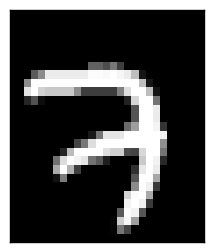

y-> [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [4]:
data = batch_xs[0]
draw_digit(data)
print("y->",batch_ys[0])

# TensorFlowのセットアップをする

In [5]:
import tensorflow as tf

入力の箱と変数を用意して、式を作る

In [6]:
x = tf.placeholder(tf.float32, [None, 784])

In [7]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [8]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
y_ = tf.placeholder(tf.float32, [None, 10])

最小化するのはクロスエントロピー

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

Optimizerには最急降下法を使う

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

変数を初期化する

In [12]:
init = tf.global_variables_initializer()

In [13]:
sess = tf.Session()
sess.run(init)

ミニバッチで学習させる

In [14]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [15]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [16]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9193


91%ぐらいの制度が出る